In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%time
csv_file_path = 'C:\\Users\\diego\\OneDrive\\Documentos\\Pasantia\\mosquito_data\\mimami20172010Wynwood.csv'
df = pd.read_csv(csv_file_path)
## print(df.head()) ## controlar
temp = df['Temperatura'].tolist()
print()
#[print(temp[:10])]
# Calculate the averages for each group of 8 entries
group_size = 8
daily_avg_temp = []
for i in range(0, len(temp), group_size):
    group = temp[i:i+group_size]
    group_average = sum(group) / len(group)
    daily_avg_temp.append(group_average)


CPU times: total: 0 ns
Wall time: 0 ns



## Cálculo de parametros entomológicos
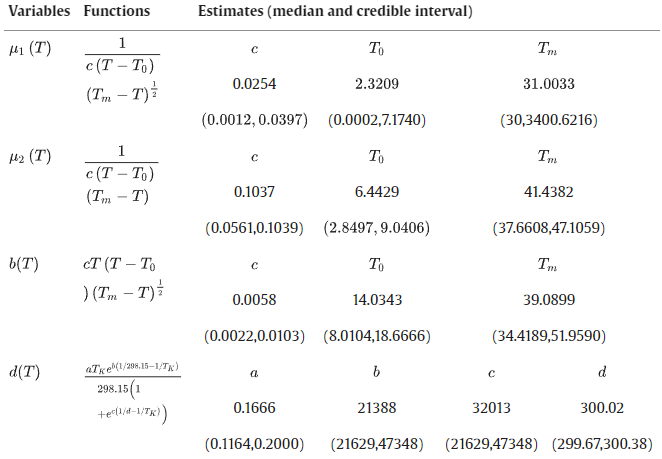

In [5]:
%time
#mu1 time-dependent death rates of immature mosquitoes
c = 0.0254
T0 = 2.3209
Tm = 31.0033
mu1 = []
for i in range(len(daily_avg_temp)):
    u1 = 1/( c*( daily_avg_temp[i] - T0 )*( Tm-daily_avg_temp[i] ) )
    mu1.append(u1)
print(mu1[:10])

CPU times: total: 0 ns
Wall time: 0 ns
[0.2640923419104199, 0.2867213916775676, 0.3016651749014659, 0.28549836926517635, 0.22997886256707456, 0.23454402962660972, 0.3211799856421637, 0.19146602288066936, 0.19627808535935176, 0.20826094863438638]


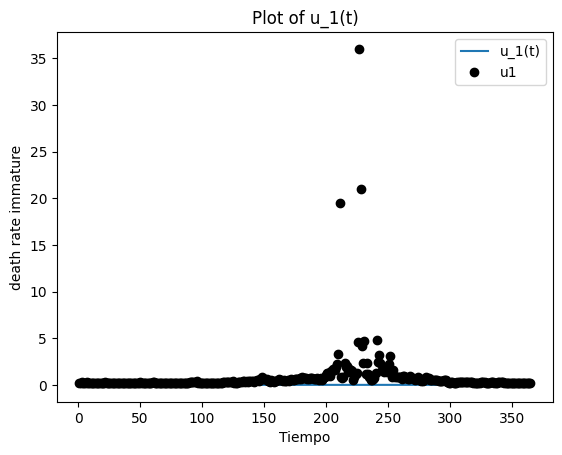

In [10]:
# fit mu1
time = np.linspace(1, 365, 365, dtype=int)
u_1_t = lambda t: (0.03411272-0.00299637*np.sin(2*np.pi*t/365) - 0.00350181*np.cos(2*np.pi*t/365))
u_1 = u_1_t(time)
plt.plot(time, u_1, label='u_1(t)')
plt.title('Plot of u_1(t)')
plt.xlabel('t')
plt.ylabel('u_1')
plt.legend()
plt.plot(time, mu1[:365], 'ko', linewidth=2, label='u1')
plt.xlabel('Tiempo')
plt.ylabel('death rate immature')
plt.legend()
plt.show()

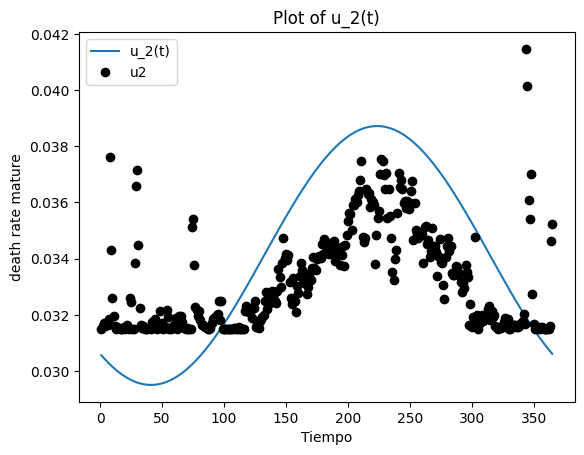

In [13]:
#mu2 time-dependent death rates of adult mosquitoes
c = 0.1037
T0 = 6.4429
Tm = 41.4382
mu2 = []
for i in range(len(daily_avg_temp)):
    u2 = 1/( c*( daily_avg_temp[i] - T0 )*( Tm-daily_avg_temp[i] ) )
    mu2.append(u2)

time = np.linspace(1, 365, 365, dtype=int)
u_2_t = lambda t: (0.03354552-0.00073822*np.sin(2*np.pi*t/365) - 0.00050008*np.cos(2*np.pi*t/365))
u_2 = u_1_t(time)
plt.plot(time, u_2, label='u_2(t)')
plt.title('Plot of u_2(t)')
plt.xlabel('t')
plt.ylabel('u_2')
plt.legend()
plt.plot(time, mu2[:365], 'ko', linewidth=2, label='u2')
plt.xlabel('Tiempo')
plt.ylabel('death rate mature')
plt.legend()
plt.show()


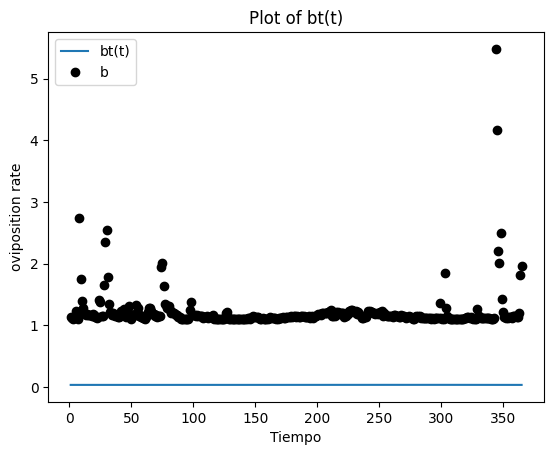

In [14]:
#b time-dependent oviposition rate

c = 0.0058
T0 = 14.0343
Tm = 39.0899
b = []
for i in range(len(daily_avg_temp)):
    b_aux = 1/( c*( daily_avg_temp[i] - T0 )*( Tm-daily_avg_temp[i] ) )
    b.append(b_aux)

time = np.linspace(1, 365, 365, dtype=int)
b_t = lambda t: (6.20618176-0.00073822*np.sin(2*np.pi*t/365) - 0.00050008*np.cos(2*np.pi*t/365))
bt = b_t(time)
plt.plot(time, bt, label='bt(t)')
plt.title('Plot of bt(t)')
plt.xlabel('t')
plt.ylabel('bt')
plt.legend()
plt.plot(time, b[:365], 'ko', linewidth=2, label='b')
plt.xlabel('Tiempo')
plt.ylabel('oviposition rate')
plt.legend()
plt.show()

In [ ]:
#d time-dependent development rate